conda install -c conda-forge imbalanced-learn  

pip uninstall scikit-learn

pip install scikit-learn==1.1.0

In [1]:
import pandas as pd

In [2]:
data=pd.read_pickle('2317_vector_full_data.pkl')

In [3]:
#使用方式 與格式 1
print(data['Info'])
print(data['Words'][1000:1002])
print(data['Vectors'][1000:1002])
print(data['Label'][1000:1002])

0                               董事會決議日期   
1                     發放股利種類及金額 現金股利美金   元
2                                其他應敘明事項 無
3                               董事會決議日期   
4         發放股利種類及金額 \n股票股利美金   元 配發新股  股  
                       ...                
49523                         本次交易為關係人交易 否
49524                        董事會通過日期 \n不適用
49525                        監察人承認日期 \n不適用
49526                    本次交易會計師出具非合理性意見 否
49527                           其他敘明事項 \n無
Name: Info, Length: 49528, dtype: object
1000                 [董事會, 通過, 日期, 不, 適用]
1001    [監察人, 承認, 審計, 委員會, 同意, 日期, 不, 適用]
Name: Words, dtype: object
1000    [[0.060508467, 0.3024362, 1.744864, -1.9498981...
1001    [[3.9632685, -2.7145953, 2.6416998, -1.0490379...
Name: Vectors, dtype: object
1000    0.0
1001    0.0
Name: Label, dtype: object


# redefine label 0超不好 1不好 2中立 3好 4超好

In [4]:
copydata=data.copy()
copydata['newLabel']=0
copydata['Label']=copydata['Label'].astype(float)
for i in range(len(data)):
    if(copydata['Label'][i]>=0.3 and copydata['Label'][i]<0.7):
        copydata['newLabel'][i]=3
    elif(copydata['Label'][i]>=0.7 and copydata['Label'][i]<=1.0):
        copydata['newLabel'][i]=4
    elif(copydata['Label'][i]==0.0):
        copydata['newLabel'][i]=2
    elif(copydata['Label'][i]>-0.7 and copydata['Label'][i]<=-0.2):
        copydata['newLabel'][i]=1
    elif(copydata['Label'][i]<=-0.7 and copydata['Label'][i]>=-1.0):
        copydata['newLabel'][i]=0
copydata['newLabel']        


C:\Users\user\AppData\Local\Temp\ipykernel_19260\1167576641.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copydata['newLabel'][i]=1
C:\Users\user\AppData\Local\Temp\ipykernel_19260\1167576641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copydata['newLabel'][i]=2
C:\Users\user\AppData\Local\Temp\ipykernel_19260\1167576641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copydata['newLabel'][i]=3
C:\Users\user\AppData\L

0        1
1        1
2        1
3        1
4        1
        ..
49523    3
49524    3
49525    3
49526    3
49527    3
Name: newLabel, Length: 49528, dtype: int64

# 攤平陣列

In [5]:
from tqdm import tqdm
def doubbleArr2One(copydata):
    counter=[]
    temp=[]
    for i in tqdm(range(len(copydata))):
        temp=copydata['Vectors'][i][0].tolist()
        for j in range(len(copydata['Vectors'][i])):
            temp=temp+copydata['Vectors'][i][j].tolist()
        counter.append(temp)
    return counter
# print(np.array(copydata['Vectors'][5000]).flatten().size)

In [6]:
counter=doubbleArr2One(copydata)
minValue=counter[0][0]
for i in tqdm(range(len(counter))):
    for j in range(len(counter[i])):
        minValue=min(minValue,counter[i][j])
for i in tqdm(range(len(counter))):
    for j in range(len(counter[i])):
        counter[i][j]-=minValue
counter[0][4],minValue

100%|██████████████████████████████████████████████████████████████████████████| 49528/49528 [00:09<00:00, 4966.50it/s]


(14.076935529708862, -15.159257888793945)

In [7]:
sentiment=[]
for i in range(len(copydata)):
    sentiment.append(copydata['newLabel'][i])

In [9]:
from tensorflow.keras.datasets import  imdb 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
import numpy as np
from sklearn.model_selection import train_test_split # to split test and train
from tensorflow.keras.utils import to_categorical # to categorical data

In [10]:
oldy = to_categorical(sentiment).astype(int)
oldx=sequence.pad_sequences(np.array(counter),maxlen=512,dtype='float32')


C:\Users\user\AppData\Local\Temp\ipykernel_19260\505788222.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  oldx=sequence.pad_sequences(np.array(counter),maxlen=512,dtype='float32')


# 查看資料占比

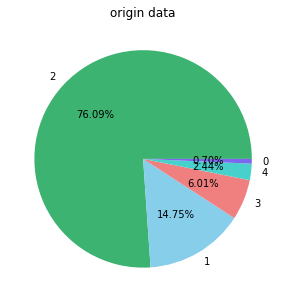

34669

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(oldx, copydata['newLabel'], test_size=0.3,random_state=11)
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
y_train.value_counts().plot( kind='pie', colors=['mediumseagreen','skyblue','lightcoral','mediumturquoise','mediumslateblue'], autopct='%1.2f%%' )
plt.title( 'origin data' )  # 圖標題
plt.ylabel( '' )
plt.show()
# .value_counts()
len(y_train)

# oversample 

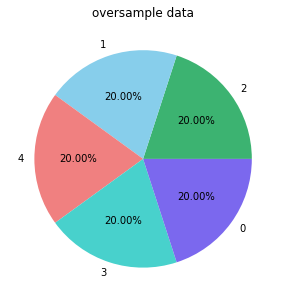

'oversample size為131905'

In [24]:
from imblearn.over_sampling import SMOTE
X_train_balance_over, y_train_balance_over = SMOTE().fit_resample(X_train, y_train)
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
y_train_balance_over.value_counts().plot( kind='pie', colors=['mediumseagreen','skyblue','lightcoral','mediumturquoise','mediumslateblue'], autopct='%1.2f%%' )
plt.title( 'oversample data' )  # 圖標題
plt.ylabel( '' )
plt.show()
f'oversample size為{len(y_train_balance_over)}'

# undersample 

In [ ]:
from imblearn.under_sampling import TomekLinks
X_train_balance_under, y_train_balance_under = TomekLinks().fit_resample(X_train, y_train)
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
y_train_balance_under.value_counts().plot( kind='pie', colors=['mediumseagreen','skyblue','lightcoral','mediumturquoise','mediumslateblue'], autopct='%1.2f%%' )
plt.title( 'undersample data' )  # 圖標題
plt.ylabel( '' )
plt.show()
f'undersample size為{len(y_train_balance_under)}'

# oversample and undersample  

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
X_res, y_res = SMOTE().fit_resample(X_train, y_train)
X_res, y_res = TomekLinks().fit_resample(X_res, y_res)
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
y_res.value_counts().plot( kind='pie', colors=['mediumseagreen','skyblue','lightcoral','mediumturquoise','mediumslateblue'], autopct='%1.2f%%' )
plt.title( 'balance data' )  # 圖標題
plt.ylabel( '' )
plt.show()
f'balance size為{len(y_res)}'

In [ ]:
y_res = to_categorical(y_res).astype(int)

# create model

In [56]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras import layers
model = Sequential()
model.add(Embedding(14200,64,input_length=512))
# model.add(layers.SimpleRNN(80))
# model.add(layers.Flatten())
model.add(GRU(64))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 512, 64)           908800    
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
Total params: 934,085
Trainable params: 934,085
Non-trainable params: 0
_________________________________________________________________
None


In [1]:
from tensorflow.keras.callbacks import TensorBoard
import os
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model.fit(x_res,y_res, epochs=10 ,validation_split=0.1,callbacks=[tb_callback])

In [62]:
model.save('final.h5')

# check result

In [64]:
res=model.predict(oldx)

In [71]:
label=[]
for i in range(len(res)):
    label.append(np.argmax(res[i]))

In [72]:
c=0
for i in range(len(label)):
    if(label[i]!=2):
        c+=1
len(label),c

(49528, 20863)

In [67]:
model.evaluate(oldx,oldy)

1548/1548 [==============================] - 19s 12ms/step - loss: 1.0139 - accuracy: 0.7373


[1.0138849020004272, 0.7372597455978394]

In [83]:
model.evaluate(oldx,oldy)

1548/1548 [==============================] - 16s 10ms/step - loss: 0.3651 - accuracy: 0.8402


[0.3651164770126343, 0.840171217918396]

In [61]:
counter=0
for i in range(len(y)):
    if (np.argmax(y[i])!=2):
        counter+=1

In [63]:
counter,len(y)

(11850, 49528)

# Balance data

In [41]:
def balanceData(copydata):
    balance=[]
    fx=[]
    fy=[]
    counter2=0
    counter1=0
#   只增加一半為中立的data
    for i in range(len(copydata)):
        if(copydata['newLabel'][i]==2):
            if(counter2<=3002):
                balance.append(pd.DataFrame(copydata.iloc[i]))
                counter2+=1
        elif(copydata['newLabel'][i]==1):
            if(counter1<=3002):
                balance.append(pd.DataFrame(copydata.iloc[i]))
                counter1+=1
        else:
            balance.append(pd.DataFrame(copydata.iloc[i]))
    filter1=balance[0].T
    for i in range(len(balance)-1):
        filter1=pd.concat([filter1,balance[i+1].T], join='inner')
#   index會亂掉要重製
    filter1=filter1.reset_index()
#   只取出label
    for i in range((len(filter1))):
        fy.append(filter1['newLabel'][i])
#   攤平vector
    x=doubbleArr2One(filter1)
    minValue=x[0][0]
    for i in tqdm(range(len(x))):
        for j in range(len(x[i])):
#             filter1['Vectors'][i][j]=abs(filter1['Vectors'][i][j])
              x[i][j]+=15.159257888793945
#               print(x[i][j])
    print('攤平',minValue)
#   fixed size
    x=sequence.pad_sequences(np.array(x),maxlen=512,dtype='float32')
#   one hot   
    y=to_categorical(fy).astype(int)
    return x,y
x,y=balanceData(copydata)

100%|██████████████████████████████████████████████████████████████████████████| 10540/10540 [00:01<00:00, 8627.22it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_3216\776273037.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x=sequence.pad_sequences(np.array(x),maxlen=512,dtype='float32')


攤平 0.06050846725702286


In [65]:
oldcounter=[0,0,0,0,0]
counter=[0,0,0,0,0]
predict_counter=[0,0,0,0,0]
for i in range(len(copydata)):
    for j in range(5):
        if(copydata['newLabel'][i]==j):
            oldcounter[j]+=1
for i in range(len(y)):
    for j in range(5):
        if(np.argmax(y[i])==j):
            counter[j]+=1
for i in range(len(res)):
    for j in range(5):
        if(np.argmax(res[i])==j):
            predict_counter[j]+=1
oldcounter,counter,predict_counter        

([333, 7316, 37678, 3002, 1199],
 [333, 3003, 3003, 3002, 1199],
 [864, 501, 48158, 0, 5])

In [85]:

for i in range(len(copydata)):
    copydata['predict'][i]=np.argmax(res[i])
copydata['predict']

C:\Users\user\AppData\Local\Temp\ipykernel_3116\4277280088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copydata['predict'][i]=np.argmax(res[i])


0        1
1        1
2        2
3        1
4        2
        ..
49523    3
49524    3
49525    3
49526    1
49527    1
Name: predict, Length: 49528, dtype: int64

In [88]:
for i in range(len(copydata)):
    if(copydata['predict'][i]==4):
        print(copydata['Info'][i])

 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求
 取得或處分之具體目的或用途 
營運需求


In [86]:
predict=[]
info=[]
for i in range(len(copydata)):
    predict.append(copydata['predict'][i])
    info.append(copydata['Info'][i])
df_label=pd.DataFrame(label,columns=['Label'])
df_info=pd.DataFrame(info,columns=['Info'])
df_label=df_label.merge(df_info, how='inner', left_index=True, right_index=True)
df_label.to_csv('labelData.csv')
df_label.to_excel('labelData.xlsx')

In [68]:
model.load_weights('0808balance_abs16.h5')
model.evaluate(oldx,oldy)

1548/1548 [==============================] - 19s 12ms/step - loss: 1.0220 - accuracy: 0.7407


[1.0219806432724, 0.7407324910163879]

In [3]:
import pandas as pd 
df=pd.read_csv('predictlabelData.csv')
df


,Unnamed: 0,Label,Info
0,0,2,董事會決議日期
1,1,3,發放股利種類及金額 現金股利美金 元
2,2,3,其他應敘明事項 無
3,3,2,董事會決議日期
4,4,2,發放股利種類及金額 \n股票股利美金 元 配發新股 股
...,...,...,...
49523,49523,3,本次交易為關係人交易 否
49524,49524,3,董事會通過日期 \n不適用
49525,49525,3,監察人承認日期 \n不適用
49526,49526,3,本次交易會計師出具非合理性意見 否
